In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm.auto import tqdm

# Import data

## Images

Get filenames

In [2]:
file_names = os.listdir('Data/images')
file_names[:5]

['models', 'Test_0.jpg', 'Test_1.jpg', 'Test_10.jpg', 'Test_100.jpg']

**Divide into Train and Test sets**

In [3]:
train_filenames = []
test_filenames = []
for file_name in file_names:
    if 'Train' in file_name:
        train_filenames.append(file_name)
    else: 
        test_filenames.append(file_name)
print(f'There are {len(train_filenames)} train images and {len(test_filenames)} test images')

There are 1821 train images and 1822 test images


See a sample

In [5]:
img = cv2.imread(f'Data/images/{train_filenames[0]}')
img.shape

(1365, 2048, 3)

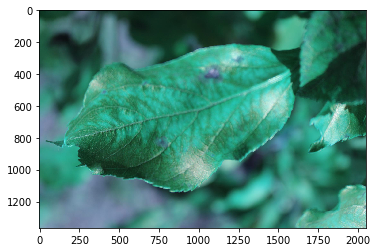

In [6]:
plt.imshow(img);

Load data into a numpy array with reduce image sizes

In [24]:
train_images = np.zeros((len(train_filenames), img.shape[0]//7,int((img.shape[0]//7)*1.5),3))
count = 0
for file in tqdm(train_filenames):
    image = cv2.imread(f'Data/images/{file}')
    small_img = cv2.resize(image, (int((img.shape[0]/7)*1.5), img.shape[0]//7), interpolation = cv2.INTER_CUBIC)
#     im_data = np.dot(small_img[...,:3], [0.2989, 0.5870, 0.1140])
#     im_data /= np.max(im_data)
    train_images[count,:,:,:] = small_img
    count += 1

In [ ]:
# test_images = np.zeros((img.shape[0]//7,int((img.shape[0]/7)*1.5),(len(test_filenames))))
# count = 0
# for file in tqdm(test_filenames):
#     image = cv2.imread(f'Data/images/{file}')
#     small_img = cv2.resize(image, (int((img.shape[0]/7)*1.5), img.shape[0]//7), interpolation = cv2.INTER_CUBIC)
#     im_data = np.dot(small_img[...,:3], [0.2989, 0.5870, 0.1140])
#     im_data /= np.max(im_data)
#     test_images[:,:,count] = im_data
#     count += 1

See the new sample

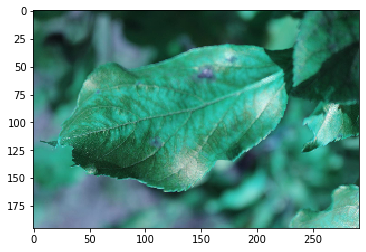

In [67]:
plt.imshow(train_images[0].astype(np.int));

## Labels

In [7]:
train_labels = pd.read_csv('Data/train.csv')
test_labels = pd.read_csv('Data/test.csv')
train_labels.shape, test_labels.shape

((1821, 5), (1821, 1))

In [8]:
train_labels.head(2)

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0


The images have a different order

In [9]:
train_labels['idx'] = train_labels.image_id.apply(lambda x: train_filenames.index(x+'.jpg'))
train_labels.sort_values(by='idx', inplace=True)
# test_labels['idx'] = test_labels.image_id.apply(lambda x: test_filenames.index(x+'.jpg'))
# test_labels.sort_values(by='idx', inplace=True)
train_labels.head()

,image_id,healthy,multiple_diseases,rust,scab,idx
0,Train_0,0,0,0,1,0
1,Train_1,0,1,0,0,1
10,Train_10,0,0,1,0,2
100,Train_100,1,0,0,0,3
1000,Train_1000,0,0,1,0,4


In [10]:
train_labels.loc[train_labels.healthy == 1, 'label'] = 'healthy'
train_labels.loc[train_labels.multiple_diseases == 1, 'label'] = 'multiple_diseases'
train_labels.loc[train_labels.rust == 1, 'label'] = 'rust'
train_labels.loc[train_labels.scab == 1, 'label'] = 'scab'
train_labels.head()

,image_id,healthy,multiple_diseases,rust,scab,idx,label
0,Train_0,0,0,0,1,0,scab
1,Train_1,0,1,0,0,1,multiple_diseases
10,Train_10,0,0,1,0,2,rust
100,Train_100,1,0,0,0,3,healthy
1000,Train_1000,0,0,1,0,4,rust


# Label count

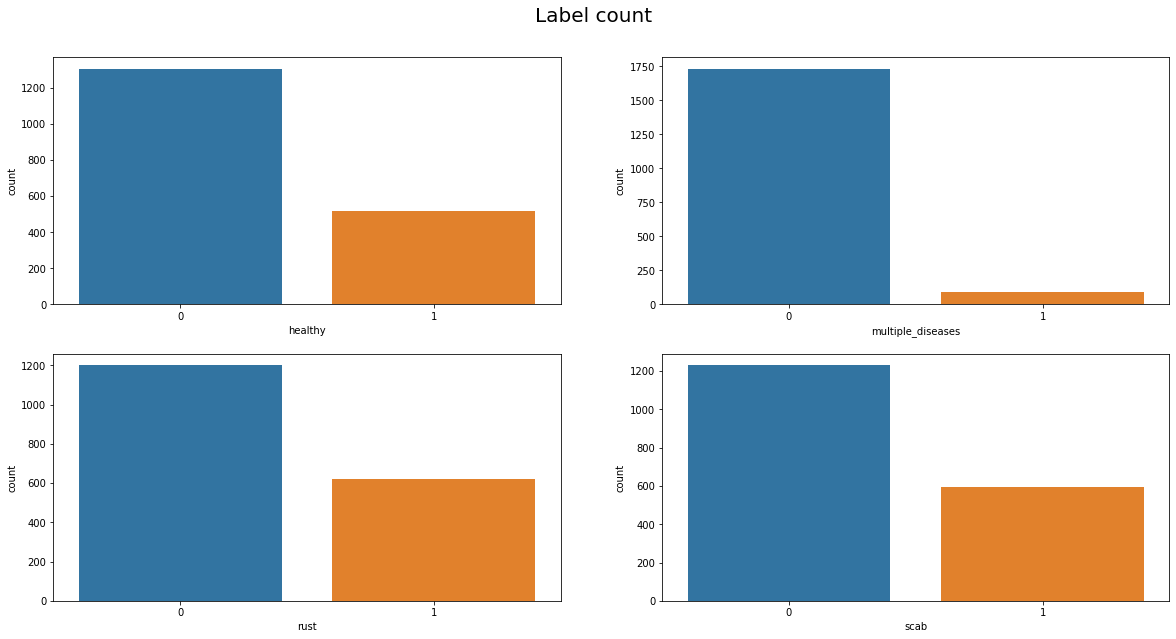

In [21]:
fig, ax = plt.subplots(2,2, figsize=(20,10))
sns.countplot(train_labels.healthy, ax=ax[0,0])
sns.countplot(train_labels.multiple_diseases, ax=ax[0,1])
sns.countplot(train_labels.rust, ax=ax[1,0])
sns.countplot(train_labels.scab, ax=ax[1,1])
plt.suptitle('Label count', y= 0.95, size=20)
plt.show()

# Show one image of each label

One index of each label

In [34]:
healthy_idx = train_labels[train_labels.label=='healthy'].iloc[0].name
multiple_diseases_idx = train_labels[train_labels.label=='multiple_diseases'].iloc[0].name
rust_idx = train_labels[train_labels.label=='rust'].iloc[0].name
scab_idx = train_labels[train_labels.label=='scab'].iloc[0].name

Get the image for every index

In [51]:
healthy_img = train_images[healthy_idx].astype(np.int)
multiple_diseases_img = train_images[multiple_diseases_idx].astype(np.int)
rust_img = train_images[rust_idx].astype(np.int)
scab_img = train_images[scab_idx].astype(np.int)

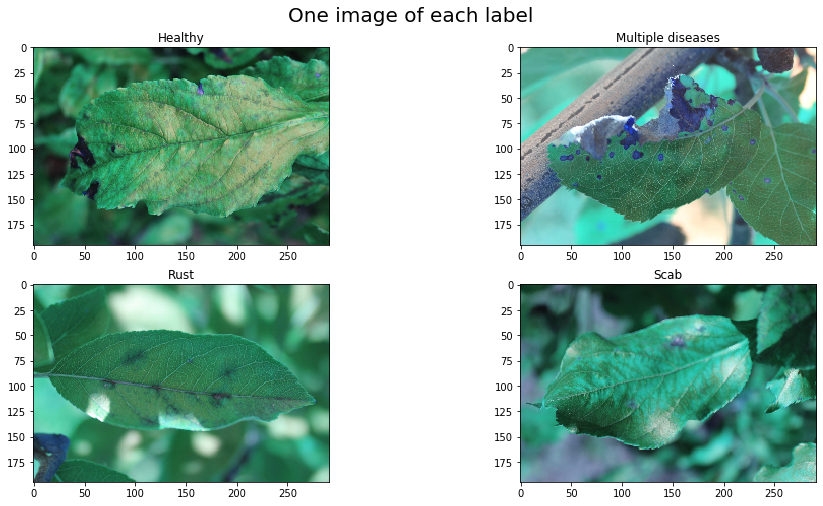

In [54]:
fig, ax = plt.subplots(2,2, figsize=(16,8))
ax[0,0].imshow(healthy_img)
ax[0,0].set_title('Healthy')
ax[0,1].imshow(multiple_diseases_img)
ax[0,1].set_title('Multiple diseases')
ax[1,0].imshow(rust_img)
ax[1,0].set_title('Rust')
ax[1,1].imshow(scab_img)
ax[1,1].set_title('Scab')
plt.suptitle('One image of each label', y= 0.95, size=20)
plt.show()

# data augmentation

In [78]:
sample_img = train_images[1].astype(np.int)

In [79]:
flipVertical = cv2.flip(sample_img, 0)
flipHorizontal = cv2.flip(sample_img, 1)
flipBoth = cv2.flip(sample_img, -1)

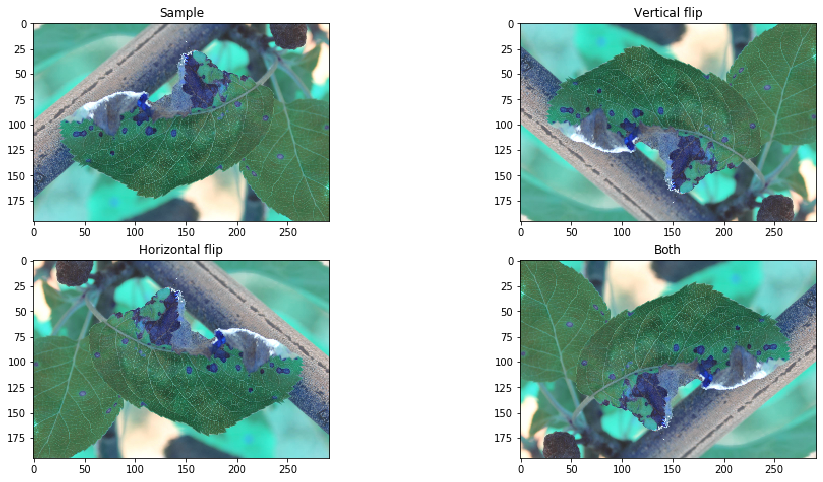

In [80]:
fig, ax = plt.subplots(2,2, figsize=(16,8))
ax[0,0].imshow(sample_img)
ax[0,0].set_title('Sample')
ax[0,1].imshow(flipVertical)
ax[0,1].set_title('Vertical flip')
ax[1,0].imshow(flipHorizontal)
ax[1,0].set_title('Horizontal flip')
ax[1,1].imshow(flipBoth)
ax[1,1].set_title('Both')
plt.show()

For the model those are completely different images

## Resize images to 256, 128, 64

I could also resize images for more data augmentation